#**PANDAS**

Pandas is an open-source Python library used for data analysis, manipulation, and processing. It provides high-performance, easy-to-use data structures and functions that make working with structured data (like tables and time series) intuitive and efficient.

The name "Pandas" comes from "Panel Data", which refers to multidimensional structured datasets commonly used in statistics and econometrics.

###**Key Features of Pandas**
Data Structures:

Series: A one-dimensional labeled array, like a column in a spreadsheet.

DataFrame: A two-dimensional labeled data structure, similar to a table or spreadsheet, where rows and columns can have labels.
Panel (deprecated): A three-dimensional data structure.

Data Manipulation:
Filtering, sorting, and reshaping data.
Handling missing data (NaN values).
Merging, joining, and concatenating datasets.

Data Analysis:
Summarizing data using statistics (mean, median, count, etc.).
Grouping and aggregating data with groupby.
Time-series analysis and operations.

File Input/Output:
Read and write data to and from formats like CSV, Excel, SQL databases, JSON, and more.

Integration:
Works seamlessly with other Python libraries like NumPy, Matplotlib, and Scikit-learn.

Performance:
Built on top of NumPy, allowing for efficient numerical computations and operations on large datasets.


In [1]:
#installation
!pip install pandas

In [2]:
#importing
import pandas as pd

###**CREATING DATAFRAME**

In [ ]:
#from csv file
df=pd.read_csv('data.csv')    # data.csv is the file name, include path
#from Excel
df=pd.read_excel('data.xlsx')
#from JSON
df=pd.read_json('data.json')



In [3]:
#create DataFrame with dictionary
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'San Francisco', 'Los Angeles']}
df = pd.DataFrame(data)

In [4]:
#create DataFrame using multiple lists
names = ['Alice', 'Bob', 'Charlie']
ages = [25, 30, 35]
cities = ['New York', 'San Francisco', 'Los Angeles']
data = {'Name': names, 'Age': ages, 'City': cities}
df = pd.DataFrame(data)

###**VIEWING DATA**

In [5]:
df.head()  # First 5 rows
df.tail()  # Last 5 rows
df.info()  # Summary of the DataFrame
df.describe()  # Statistical summary
df.shape  # Dimensions (rows, columns)
df.columns  # Column names
df.dtypes  # Data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


,0
Name,object
Age,int64
City,object


###**SELECTING DATA**

In [6]:
# Select a single column
df['Name']

# Select multiple columns
df[['Name', 'Age']]

# Select rows by index
df.iloc[0]  # First row
df.iloc[0:3]  # First three rows
df.iloc[-1]  # Last row
df.iloc[:,-1] #last column entirely

# Select rows by condition
df[df['Age'] > 25]


,Name,Age,City
1,Bob,30,San Francisco
2,Charlie,35,Los Angeles


###**MODIFYING DATA**

In [7]:
# Adding a new column
df['Country'] = ['USA', 'France', 'UK']

# Updating values
df.loc[0, 'Age'] = 25  # Update age for the first row

# Dropping columns
df.drop(columns=['City'], inplace=True)

# Renaming columns
df.rename(columns={'Name': 'Full Name'}, inplace=True)


####**When to Use .iloc or .loc**
**Use .iloc when:**

You want to access data by numerical positions.
Labels are not known or needed.
Indexes are integer-based but you're focusing on positions rather than labels.

**Use .loc when:**

You want to access data by row/column labels.
You are working with a custom index or named columns.
You need to filter data based on conditions.

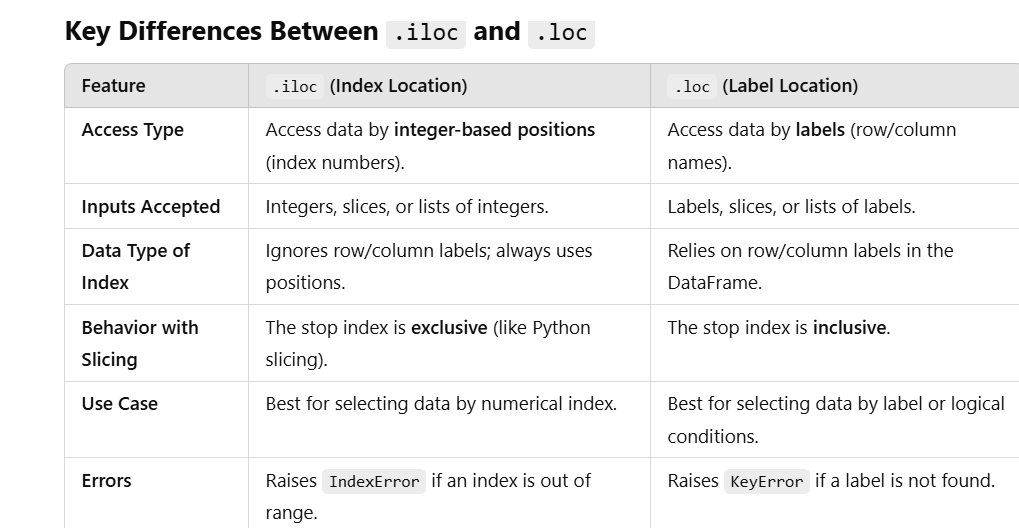

###**HANDLE MISSING DATA**

In [ ]:
# Check for missing values
df.isnull().sum()

# Drop rows/columns with missing values
df.dropna(inplace=True)

# Fill missing values with zero, instead of zero we can use df['Age'].mean() or median() or mode() based on situation
df['Age'].fillna(0, inplace=True)


###**AGGREGATION AND GROUP**

In [10]:
df.head()

,Full Name,Age,Country
0,Alice,25,USA
1,Bob,30,France
2,Charlie,35,UK


In [12]:
# Aggregation
df['Age'].mean()  # Mean age
df['Age'].sum()   # Sum of ages

# Grouping
df.groupby('Country')['Age'].sum() #group by country, perform aggreation based on age


,Age
Country,
France,30
UK,35
USA,25


###**MERGE AND JOIN**

In [14]:
# Merge two DataFrames
df1 = pd.DataFrame({'ID': [1, 2], 'Name': ['John', 'Alice']})
df2 = pd.DataFrame({'ID': [1, 2], 'Age': [24, 27]})
merged_df = pd.merge(df1, df2, on='ID')

# Concatenate two DataFrames
concat_df = pd.concat([df1, df2], axis=0)  # Vertical concatenation
concat_df


,ID,Name,Age
0,1,John,NaN
1,2,Alice,NaN
0,1,NaN,24.0
1,2,NaN,27.0


In [15]:
concat_df = pd.concat([df1, df2], axis=1)  # Horizontal concatenation
concat_df

,ID,Name,ID,Age
0,1,John,1,24
1,2,Alice,2,27


###**SORT**

In [16]:
# Sort by column
df.sort_values(by='Age', ascending=True, inplace=True)

# Sort by index
df.sort_index(inplace=True)


###**DATES**

In [ ]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract parts of the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Filter by date
df[df['Date'] > '2025-01-01']

###**STRING OPERATIONS**

In [ ]:
# String methods
df['Name'] = df['Name'].str.lower()  # Convert to lowercase
df['Name'] = df['Name'].str.upper()  # Convert to uppercase
df['Name'] = df['Name'].str.strip()  # Remove whitespace
df['Name'] = df['Name'].str.contains('John')  # Check for substring


###**OTHERS**

In [19]:
df.duplicated().sum() #sum of duplicates

0

In [ ]:
df.corr()  #checking Correlation